In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy.optimize as fitter
%matplotlib inline

from matplotlib.widgets import Slider, Button, RadioButtons


In [2]:
#import data from JHU github
corona_master1 = Table.read_table('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
corona_master1

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
16,AS,ASM,16,60,nan,American Samoa,US,-14.271,-170.132,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
316,GU,GUM,316,66,nan,Guam,US,13.4443,144.794,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180
580,MP,MNP,580,69,nan,Northern Mariana Islands,US,15.0979,145.674,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30
630,PR,PRI,630,72,nan,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329
850,VI,VIR,850,78,nan,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72
84001001,US,USA,840,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68,74,84,91,93,104,103,110,110,120,127,136,143,149,155,159,168,189,192,205,212,216,221,233,239,239,241,248,259,265,272,282,295
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin,

In [3]:
corona_master = corona_master1.drop("Country_Region").drop("Lat").drop("Long_").drop("Admin2").drop("FIPS").drop("code3").drop("iso3").drop("iso2").drop("UID").drop("Combined_Key")

In [4]:
corona_master = corona_master.group("Province_State", np.sum)
corona_master.show()

Province_State,1/22/20 sum,1/23/20 sum,1/24/20 sum,1/25/20 sum,1/26/20 sum,1/27/20 sum,1/28/20 sum,1/29/20 sum,1/30/20 sum,1/31/20 sum,2/1/20 sum,2/2/20 sum,2/3/20 sum,2/4/20 sum,2/5/20 sum,2/6/20 sum,2/7/20 sum,2/8/20 sum,2/9/20 sum,2/10/20 sum,2/11/20 sum,2/12/20 sum,2/13/20 sum,2/14/20 sum,2/15/20 sum,2/16/20 sum,2/17/20 sum,2/18/20 sum,2/19/20 sum,2/20/20 sum,2/21/20 sum,2/22/20 sum,2/23/20 sum,2/24/20 sum,2/25/20 sum,2/26/20 sum,2/27/20 sum,2/28/20 sum,2/29/20 sum,3/1/20 sum,3/2/20 sum,3/3/20 sum,3/4/20 sum,3/5/20 sum,3/6/20 sum,3/7/20 sum,3/8/20 sum,3/9/20 sum,3/10/20 sum,3/11/20 sum,3/12/20 sum,3/13/20 sum,3/14/20 sum,3/15/20 sum,3/16/20 sum,3/17/20 sum,3/18/20 sum,3/19/20 sum,3/20/20 sum,3/21/20 sum,3/22/20 sum,3/23/20 sum,3/24/20 sum,3/25/20 sum,3/26/20 sum,3/27/20 sum,3/28/20 sum,3/29/20 sum,3/30/20 sum,3/31/20 sum,4/1/20 sum,4/2/20 sum,4/3/20 sum,4/4/20 sum,4/5/20 sum,4/6/20 sum,4/7/20 sum,4/8/20 sum,4/9/20 sum,4/10/20 sum,4/11/20 sum,4/12/20 sum,4/13/20 sum,4/14/20 sum,4/15/20 sum,4/16/20 sum,4/17/20 sum,4/18/20 sum,4/19/20 sum,4/20/20 sum,4/21/20 sum,4/22/20 sum,4/23/20 sum,4/24/20 sum,4/25/20 sum,4/26/20 sum,4/27/20 sum,4/28/20 sum,4/29/20 sum,4/30/20 sum,5/1/20 sum,5/2/20 sum,5/3/20 sum,5/4/20 sum,5/5/20 sum,5/6/20 sum,5/7/20 sum,5/8/20 sum,5/9/20 sum,5/10/20 sum,5/11/20 sum,5/12/20 sum,5/13/20 sum,5/14/20 sum,5/15/20 sum,5/16/20 sum,5/17/20 sum,5/18/20 sum,5/19/20 sum,5/20/20 sum,5/21/20 sum,5/22/20 sum,5/23/20 sum,5/24/20 sum,5/25/20 sum,5/26/20 sum,5/27/20 sum,5/28/20 sum,5/29/20 sum,5/30/20 sum,5/31/20 sum,6/1/20 sum,6/2/20 sum,6/3/20 sum,6/4/20 sum,6/5/20 sum,6/6/20 sum,6/7/20 sum,6/8/20 sum,6/9/20 sum,6/10/20 sum
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169,2328,2703,2947,3217,3563,3734,3953,4075,4345,4571,4712,4888,5079,5317,5593,5832,6026,6026,6421,6539,6750,6912,7088,7294,7611,7888,8112,8437,8691,9046,9385,9668,9889,10164,10464,10700,11101,11373,11674,11771,12086,12376,13052,13288,13670,14117,14478,14986,15650,16032,16530,17031,17359,17952,18630,18766,18851,19072,19387,20043,20500,20925,21422,21989
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,5,8,11,13,18,30,34,41,56,58,85,102,114,119,132,143,157,171,185,190,213,226,235,246,257,272,277,285,293,300,309,314,319,321,329,335,337,339,339,340,345,351,355,355,364,365,368,370,371,372,374,377,378,379,379,383,383,383,388,388,388,388,400,401,401,403,407,407,408,410,411,424,429,433,459,466,486,504,512,523,535,543,562,572,592
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,4,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1413,1596,1769,2019,2269,2460,2575,2726,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724,4933,5068,5256,5473,5772,6045,6286,6534,6725,6955,7209,7655,7969,8364,8640,8924,9305,9707,9945,10526,10960,11119,11383,11736,12216,12674,13169,13666,13945,14208,14576,14906,15348,15624,16053,16377,16575,16864,17318,17877,18472,19258,19936,20129,21264,22356,22886,24439,25451,26989,27678,28296,29852
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946,1000,1119,1171,1228,1280,1410,1498,1569,1620,1695,1744,1781,1973,1990,2276,2599,2810,2911,3001,3069,3127,3193,3281,3337,3372,3437,3491,3525,3611,3703,3747,3747,4012,4043,4164,4236,4366,4463,4578,4759,4813,4923,5003,5458,5612,5775,5922,6029,6180,6277,6538,6777,7

In [5]:

def country_total_cases_array(country):
    
    temp_tbl = corona_master.where("Province_State", are.equal_to(country))
    country_arr = np.empty([0]) #cases start at 0
    
    for i in range(1, total_days+1):
        country_arr = np.append(country_arr, temp_tbl.column(i))
    
    return country_arr


In [6]:
def country_new_cases_array(country):
    
    temp_tbl = corona_master.where("Province_State", are.equal_to(country)).take(0)
    country_arr = np.array([0]) #so when calculating difference, arrays are the same size
    
    for i in range(1, total_days+1):
        country_arr = np.append(country_arr, temp_tbl.column(i))
    
    country_arr = np.diff(country_arr)
    
    return country_arr

test = np.array([2, 2, 2, 4, 5])
test = np.delete(test, 3)
str(5) + str(6)

'56'

In [7]:

def country_new_cases_avg_array(country, avg_days):
    
    temp_tbl = corona_master.where("Province_State", are.equal_to(country)).take(0)
    country_arr = country_new_cases_array(country)
    
    country_arr_avg = country_new_cases_array(country)

    #gives country_arr_avg all average new case values except first few. First few aren't used as average (only China)
    for i in range(avg_days-1, len(country_arr)):
        
        country_arr_avg[i] = 0.0
        
        for k in range(0, avg_days):
            
            country_arr_avg[i] = country_arr_avg[i] + (country_arr[i-k])
            #print(country_arr[i-k])
        
        country_arr_avg[i] = float(country_arr_avg[i])/avg_days
    
    return country_arr_avg


In [8]:

def plot_graph(countries, min_cases, scale):
    
    plt.figure(0)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_array(country)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.plot(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    plt.title("New cases per day VS Total cases (Lineplot)")

    
    
def scatter_graph(countries, min_cases, scale):
    
    plt.figure(1)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_array(country)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.scatter(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    plt.title("New cases per day VS Total cases (Scatterplot)")


In [9]:
def plot_time(countries, min_cases, avg_days, scale):
    
    plt.figure(4)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            time = np.arange(0, len(total_cases))
            
            plt.scatter(time, total_cases)
            plt.xlabel("Time (Days)")
            plt.ylabel("Total Cases")
            plt.legend((country))
            plt.yscale(scale)
    
    plt.legend((countries))
    plt.title("Total Cases VS Time (Scatterplot)")
    
    
    plt.figure(5)
    
    for country in countries:
        
            new_cases = country_new_cases_avg_array(country, avg_days)
            
            time = np.arange(0, len(new_cases))
            
            plt.scatter(time, new_cases)
            plt.xlabel("Time (Days)")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Time (Scatterplot)"
    plt.title(avg_days_str)

In [10]:
def plot_graph_avg(countries, min_cases, avg_days, scale):
    
    plt.figure(2)
    for country in countries:
            
            total_cases = country_total_cases_array(country)
            if country == "China":
                total_cases = np.delete(total_cases, 0)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_avg_array(country, avg_days)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.plot(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Total cases (Lineplot)"
    plt.title(avg_days_str)
    

    
def scatter_graph_avg(countries, min_cases, avg_days, scale):
    
    plt.figure(3)
    for country in countries:
            
            total_cases = country_total_cases_array(country)
            if country == "China":
                total_cases = np.delete(total_cases, 0)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_avg_array(country, avg_days)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.scatter(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Total cases (Scatterplot)"
    plt.title(avg_days_str)


Data is collected since 01/22/2020


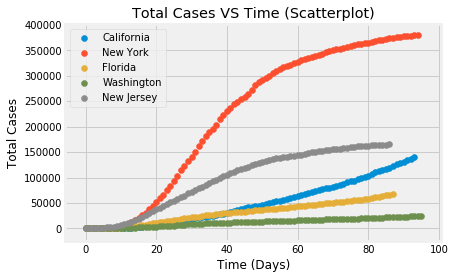

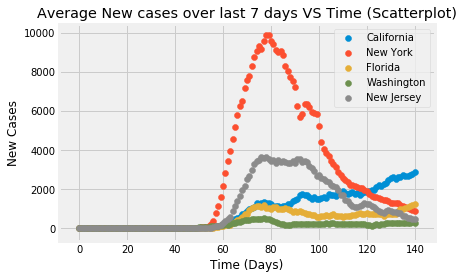

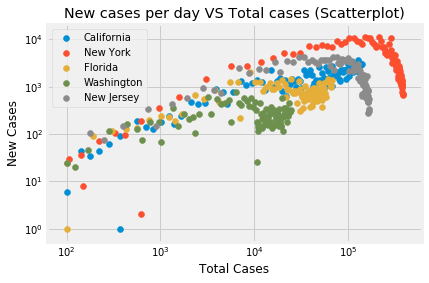

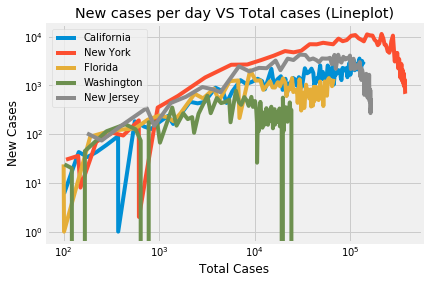

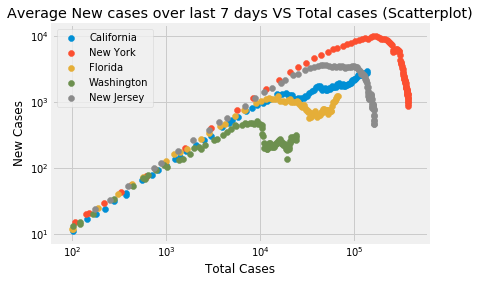

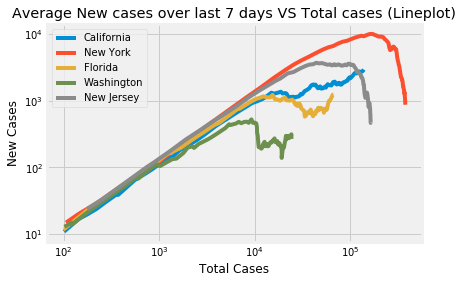

In [11]:
total_days = corona_master.num_columns - 1
num_countries = corona_master.num_columns
countries_array = corona_master.column("Province_State")


min_cases = 100
avg_days = 7
countries_to_plot = np.array(["California", "New York", "Florida", "Washington", "New Jersey"])
scale = "log" #log or linear
scale_time = "linear" #log or linear


plot_time(countries_to_plot, min_cases, avg_days, scale_time)


scatter_graph(countries_to_plot, min_cases, scale) #scatterplot of corona data

plot_graph(countries_to_plot, min_cases, scale) #lineplot of corona data

scatter_graph_avg(countries_to_plot, min_cases, avg_days, scale) #scatterplot of corona data averages

plot_graph_avg(countries_to_plot, min_cases, avg_days, scale) #lineplot of corona data averages


print("Data is collected since 01/22/2020")

In [12]:
def predict_country(country, min_cases, avg_days, population, time_prediction, scale, percent_complete):
    
    total_cases = country_total_cases_array(country)
    total_cases = total_cases[total_cases >= min_cases]
    
    #Not used, but there in case
    new_cases = country_new_cases_array(country)
    new_cases = new_cases[len(new_cases)-len(total_cases) :]

    new_cases_avg = country_new_cases_avg_array(country, avg_days)
    new_cases_avg = new_cases_avg[len(new_cases_avg)-len(total_cases) :] #new cases that corrospong to after min cases occured

    #Used
    time_arr = np.arange(0, len(total_cases), 1)
    time_predict_arr = np.arange(0, time_prediction, 1)


    dt = 1
    N = population

    S_0 = 1
    I_0 = 1.35*total_cases[0]/N
    R_0 = 0 #assuming no one's recovered until after first 100 cases (trivial assumption whose effects are negligible)
    
    def graph_predictions(time, r_tr, r_re, graph_type):
        '''Define your model function according to the
       SIR model given above. r_tr and r_re are the parameters to figure out'''
    
        S = np.zeros([len(time)])
        I = np.zeros([len(time)])
        R = np.zeros([len(time)])

        I[0] = I_0
        S[0] = S_0
        R[0] = R_0
        
        for i in range(1, len(time)):
            S[i] = S[i - 1] - (r_tr*S[i - 1]*I[i - 1])
            I[i] = I[i - 1] + (r_tr*S[i - 1]*I[i - 1] - r_re*I[i - 1])
            R[i] = R[i - 1] + (r_re*I[i - 1])
        
        S = S*N
        I = I*N
        R = R*N
        
        if graph_type == "I":
            return I
        elif graph_type == "S":
            return S
        elif graph_type == "R":
            return R
        elif graph_type == "T":
            return I + R
    
    def model_T(time, r_tr, r_re):
        '''Define your model function according to the
           SIR model given above. r_tr and r_re are the parameters to figure out'''
    
        S = np.zeros([len(time)])
        I = np.zeros([len(time)])
        R = np.zeros([len(time)])

        I[0] = I_0
        S[0] = S_0
        R[0] = R_0
        
        for i in range(1, len(time)):
            S[i] = S[i - 1] - (r_tr*S[i - 1]*I[i - 1])
            I[i] = I[i - 1] + (r_tr*S[i - 1]*I[i - 1] - r_re*I[i - 1])
            R[i] = R[i - 1] + (r_re*I[i - 1])
        
        return (I + R)*N

    
    
    # Use scipy.optimize.curve_fit() to fit the generated data and print the results
    
    #total_cases_errors = total_cases*0.25
    #par_approx = [3, 4]
    par, cov = fitter.curve_fit(model_T, time_arr, total_cases)#, par_approx, total_cases_errors, absolute_sigma=True)

    r_tr = par[0]
    r_re = par[1]
    
    error_r_tr = np.sqrt(cov[0,0])
    error_r_re = np.sqrt(cov[1,1])
    error_ratio = ((error_r_tr/r_tr) + (error_r_re/r_re))*(r_tr/r_re)

    #print ('Rate of transmission = {0:6.10f} +/- {1:5.10f}'.format(r_tr, error_r_tr))
    #print ('Rate of recovery = {0:6.10f} +/- {1:5.10f}'.format(r_re, error_r_re))
    print ('Calculated R0 Ratio (R_tr/R_re) = {0:6.4f} +/- {1:5.4f}'.format(r_tr/r_re, error_ratio))
    print("")



    # Plot fitted function over the data points
    plt.figure(0)
    fig = plt.bar(time_arr, total_cases, color='#49FA77', label = "Data")
    fig = plt.plot(time_predict_arr, model_T(time_predict_arr, r_tr, r_re), label = "Prediction")
    plt.yscale(scale)
    plt.legend(loc="upper left")
    
    title_str = "Total Cases VS Time since " + str(min_cases) + " cases"
    x_str = "Time since " + str(min_cases) + " cases (days)"
    
    plt.title(title_str)
    plt.xlabel(x_str)
    plt.ylabel("Total Cases")
    
    plt.figure(1)
    #fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "S"), color="b", label = "Uninfected")
    fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "I"), color="r", label = "Infected")
    fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "R"), color="g", label = "Recovered")
    plt.yscale(scale)
    plt.legend(loc="upper left")
    
    title_str = "Predictions VS Time since " + str(min_cases) + " cases"
    
    plt.title(title_str)
    plt.xlabel(x_str)
    plt.ylabel("Cases")
    
    #Calculate time for it to be over
    temp = graph_predictions(range(0, 500), r_tr, r_re, "T")
    max_cases = temp[len(temp) - 1]
    wanted_cases_complete = (percent_complete/100)*max_cases
    temp2 = temp[temp <= wanted_cases_complete]
    time_after_min = len(temp2)
    time_after_today = time_after_min - len(total_cases)
    
    print("Total cases in ", country, " predicted to be about ", round(max_cases))
    print("")
    print(percent_complete, "% of the cases are predicted to be over in about '", time_after_today, "' days")

    


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in double_scalars
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in double_scalars
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in add


Calculated R0 Ratio (R_tr/R_re) = 1.0011 +/- 0.0958

Total cases in  California  predicted to be about  716848.0

90 % of the cases are predicted to be over in about ' 108 ' days


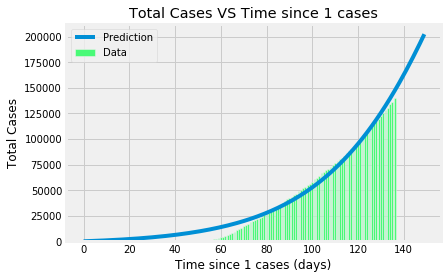

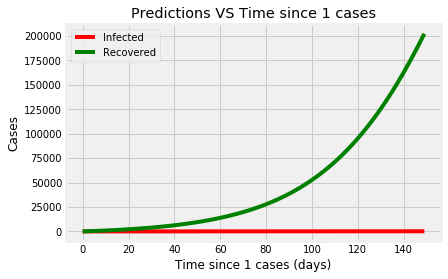

In [18]:
country = "California"
min_cases = 1
avg_days = 7
scale = "linear"

percent_complete = 90
time_prediction = 150
population = 327000000


predict_country(country, min_cases, avg_days, population, time_prediction, scale, percent_complete)